In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [55]:
diamond_data=pd.read_csv('diamonds.csv')

In [56]:
diamond_data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [57]:
diamond_data.tail()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [58]:
diamond_data=diamond_data.drop('Unnamed: 0',axis=1)

In [59]:
diamond_data.shape

(53940, 10)

In [60]:
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [61]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [62]:
diamond_data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [63]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [64]:
diamond_data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [65]:
diamond_data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [66]:
diamond_data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

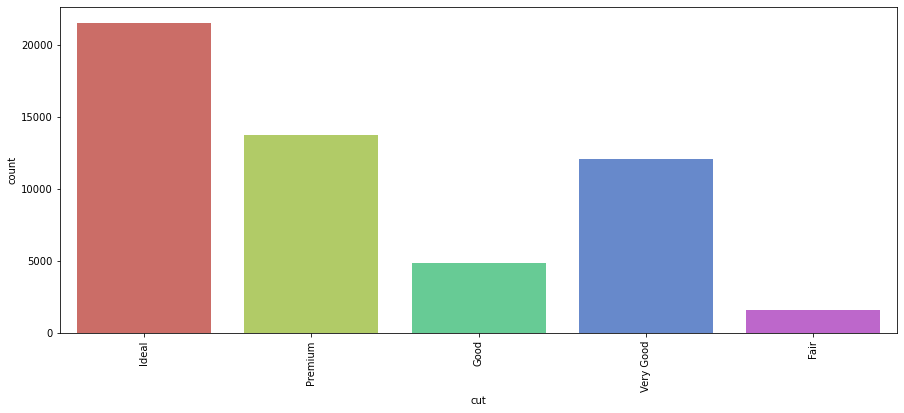

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(diamond_data['cut'], data = diamond_data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [68]:
import plotly.express as px

In [69]:
fig1 = px.histogram(diamond_data, x = "cut",color='cut')
fig1.show()

In [70]:
diamond_data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [71]:
diamond_data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [72]:
fig2 = px.histogram(diamond_data,x='color',color = 'color')
fig2.show()

In [73]:
diamond_data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [74]:
diamond_data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [75]:
fig3=px.histogram(diamond_data,x='clarity',color='clarity')
fig3.show()

In [76]:
diamond_data=diamond_data.drop(diamond_data[diamond_data["x"]==0].index)
diamond_data=diamond_data.drop(diamond_data[diamond_data["y"]==0].index)
diamond_data=diamond_data.drop(diamond_data[diamond_data["z"]==0].index)

In [77]:
#diamond_data.head()
diamond_data.shape

(53920, 10)

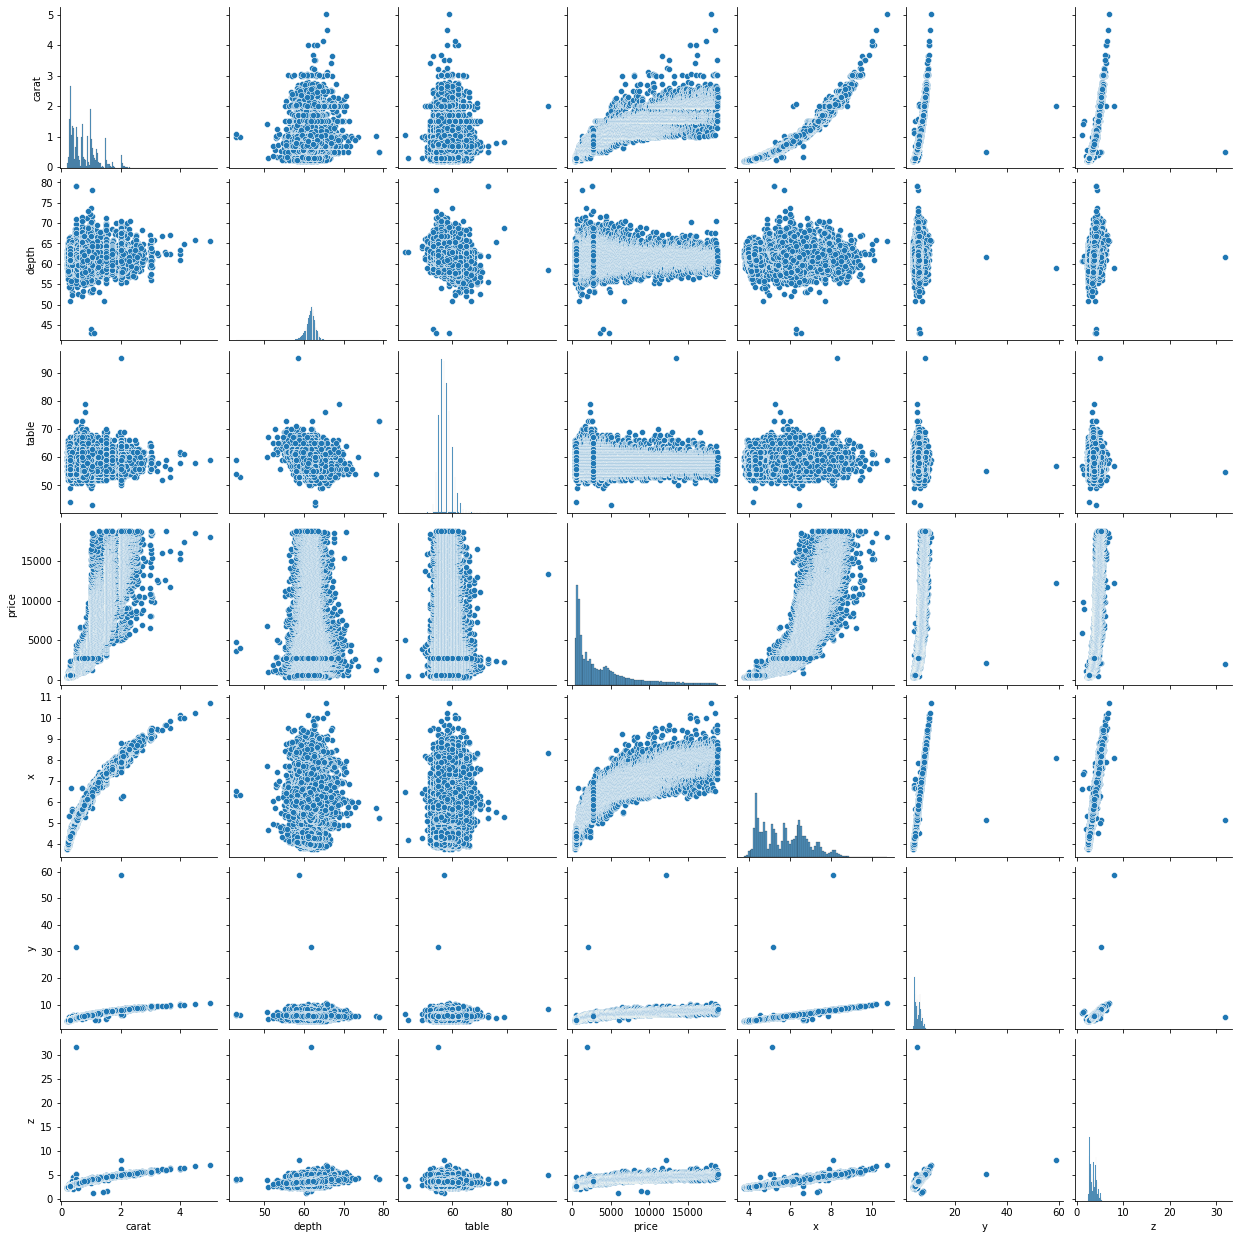

In [78]:
sns.pairplot(diamond_data)
plt.show()

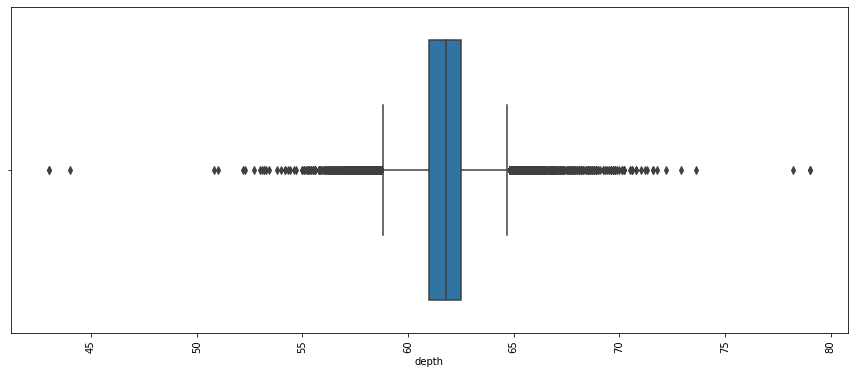

In [79]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['depth'])
plt.xticks(rotation=90)
plt.show()

In [80]:
diamond_depth=diamond_data['table']
Q3=diamond_depth.quantile(0.75)
Q1=diamond_depth.quantile(0.45)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
depth_outliers=diamond_depth[(diamond_depth<lower_limit)|(diamond_depth>upper_limit)]
depth_outliers

2        65.0
43       63.0
91       69.0
115      53.0
122      63.0
         ... 
53825    63.0
53828    63.0
53840    63.0
53881    53.0
53897    63.0
Name: table, Length: 1971, dtype: float64

In [81]:
diamond_data=diamond_data[(diamond_data["depth"]<75)&(diamond_data["depth"]>45)]

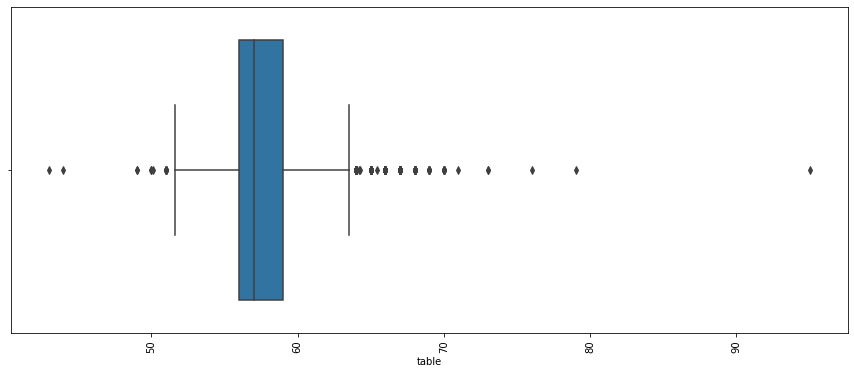

In [82]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['table'])
plt.xticks(rotation=90)
plt.show()

In [83]:
diamond_table=diamond_data['table']
Q3=diamond_table.quantile(0.80)
Q1=diamond_table.quantile(0.40)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
depth_outliers=diamond_table[(diamond_table<lower_limit)|(diamond_table>upper_limit)]
depth_outliers

2        65.0
43       63.0
91       69.0
115      53.0
122      63.0
         ... 
53825    63.0
53828    63.0
53840    63.0
53881    53.0
53897    63.0
Name: table, Length: 1968, dtype: float64

In [84]:
diamond_data=diamond_data[(diamond_data["table"]<80)&(diamond_data["table"]>40)]

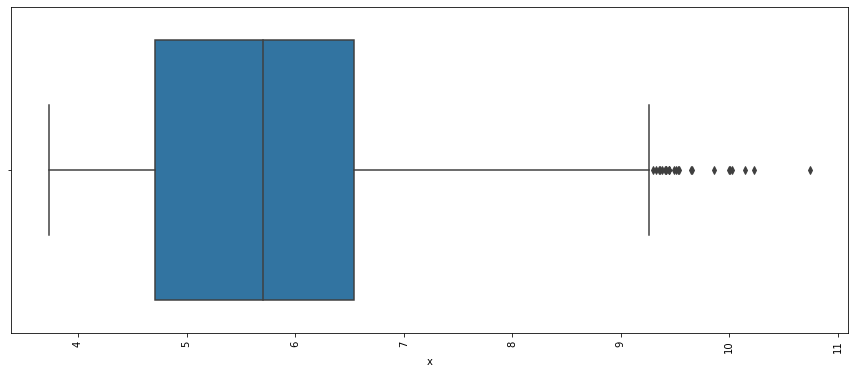

In [85]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['x'])
plt.xticks(rotation=90)
plt.show()

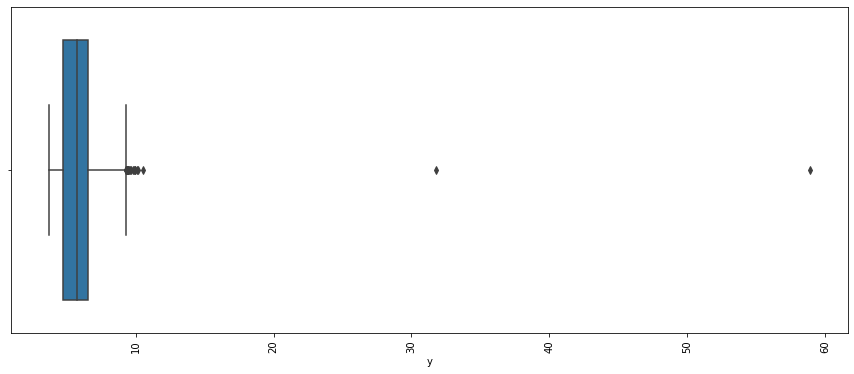

In [86]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['y'])
plt.xticks(rotation=90)
plt.show()

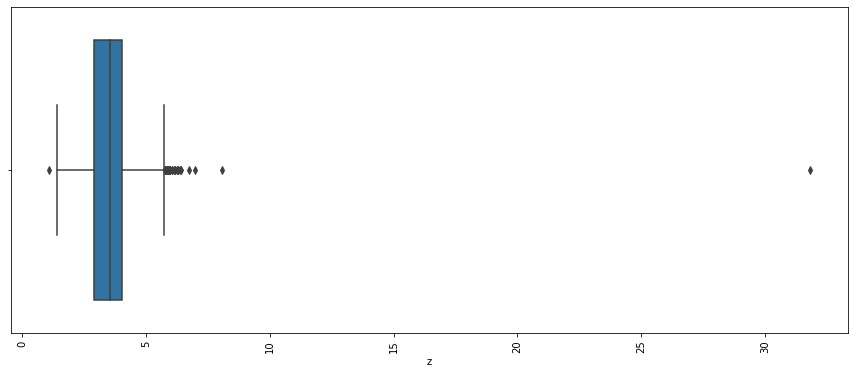

In [87]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['z'])
plt.xticks(rotation=90)
plt.show()

Model Building Process

In [88]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [89]:
s=(diamond_data.dtypes=="object")
object_cols=list(s[s].index)

In [90]:
label_data=diamond_data.copy()
label_encoder=LabelEncoder()

In [91]:
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col])

In [92]:
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [93]:
diamond_data.describe()

carat         depth         table         price             x  \
count  53913.000000  53913.000000  53913.000000  53913.000000  53913.000000   
mean       0.797670     61.749652     57.455744   3930.905422      5.731562   
std        0.473789      1.420109      2.226146   3987.304351      1.119425   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53913.000000  53913.000000  
mean       5.734828      3.539955  
std        1.140131      0.702523  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [94]:
diamond_data.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.029144  0.181723  0.921601  0.977779  0.953989  0.961090
depth  0.029144  1.000000 -0.302172 -0.010389 -0.024505 -0.028590  0.095853
table  0.181723 -0.302172  1.000000  0.127048  0.196250  0.184620  0.152335
price  0.921601 -0.010389  0.127048  1.000000  0.887230  0.867858  0.868262
x      0.977779 -0.024505  0.196250  0.887230  1.000000  0.974915  0.975478
y      0.953989 -0.028590  0.184620  0.867858  0.974915  1.000000  0.956788
z      0.961090  0.095853  0.152335  0.868262  0.975478  0.956788  1.000000

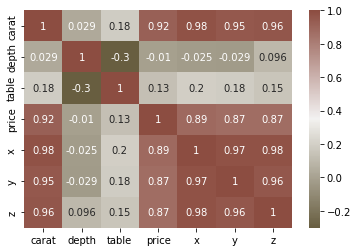

In [95]:
cmap=sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap=True)
sns.heatmap(diamond_data.corr(),cmap=cmap,annot=True)
plt.show()

In [96]:
X=label_data.drop(["price"],axis=1)
y=label_data["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

In [97]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),("lr_classifier",LinearRegression())])
pipeline_dt=Pipeline([("scalar2",StandardScaler()),("dt_classifier",DecisionTreeRegressor())])
pipeline_rf=Pipeline([("scalar3",StandardScaler()),("rf_classifier",RandomForestRegressor())])
pipeline_kn=Pipeline([("scalar4",StandardScaler()),("kn_classifier",KNeighborsRegressor())])
pipeline_xgb=Pipeline([("scalar5",StandardScaler()),("xgb_classifier",XGBRegressor())])
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]
pipe_dict={0:"LinearRegression",1:"DecisionTree",2:"RandomForest",3:"KNeighbors",4:"XGB"}
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [98]:
cv_results_rms = []
for i,model in enumerate(pipelines):
    cv_score = cross_val_score(model,X_train,y_train,scoring = "neg_mean_squared_error",cv = 10)
    cv_results_rms.append(cv_score)
    print("%s: %f "%(pipe_dict[i],cv_score.mean()))

LinearRegression: -1864555.855407 
DecisionTree: -570956.602588 
RandomForest: -305961.681994 
KNeighbors: -677179.396478 
XGB: -303080.740986 


In [99]:
pred=pipeline_xgb.predict(X_test)

In [100]:
print("Training Accuracy :",pipeline_xgb.score(X_train,y_train))
print("Testing Accuracy :" ,pipeline_xgb.score(X_test,y_test))

Training Accuracy : 0.9911508253162132
Testing Accuracy : 0.9815946865810511


In [101]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9815946865810511
Adjusted R^2: 0.9815823881312203
MAE: 277.1392685979134
MSE: 293991.77172477776
RMSE: 542.2100808033522
